Check Example Image 0


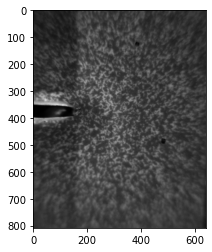

In [158]:
import numpy as np
import pandas as pd
import cv2
import os
import sys
import glob
import matplotlib.pyplot as plt

def load_file(path, flip = 'None'):
    """ 폴더에 들어간 순서대로 이미지 추가 Dict형태 좌우 반전시 flip = 'flip' 사용"""
    files = glob.glob(path+'./*.jpg')
    if not files:
        print("Chck Phath")
        sys.exit()
    img = {}
    count = 0
    for i in files:
        im = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
        if flip == 'flip':
            im = cv2.flip(im, 1)
        img.setdefault('img%d'%count,im)
        count += 1
    print('Check Example Image 0')
    plt.imshow(img['img0'], cmap='gray')
    return img

##이미지 로드
img = load_file(r'E:\experiment data\aluminum\2021-01-28\number1(dic)\DIC_GOOD', flip='')

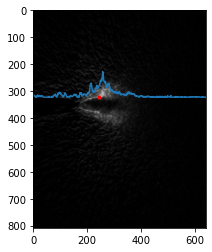

In [247]:
src1 = img['img3']
src2 = img['img2']

dst = cv2.subtract(src1, src2)
plt.imshow(dst,cmap = 'gray')
plt.scatter(np.where(dst==np.max(dst))[1][0], np.where(dst==np.max(dst))[0][0], c='red', s=10 )

plt.plot(-1*dst[np.where(dst==np.max(dst))[0][0]-10,:]+np.where(dst==np.max(dst))[0][0])
plt.savefig('./11.png',dpi=300)

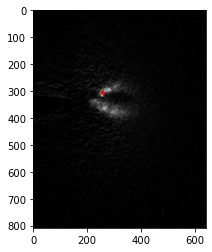

In [232]:
src1 = img['img5']
src2 = img['img4']
dst = cv2.subtract(src1, src2)
plt.imshow(dst,cmap = 'gray')
plt.scatter(np.where(dst==np.max(dst))[1][0], np.where(dst==np.max(dst))[0][0], c='red', s=10 )
# gas = cv2.GaussianBlur(dst,(0,0), 11)
# plt.contour(gas, colors='black')
plt.savefig('./22.png',dpi=300)

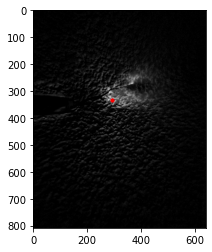

In [234]:
src1 = img['img7']
src2 = img['img6']
dst = cv2.subtract(src1, src2)
plt.imshow(dst,cmap = 'gray')
plt.scatter(np.where(dst==np.max(dst))[1][0], np.where(dst==np.max(dst))[0][0], c='red', s=10 )

plt.savefig('./33.png',dpi=300)

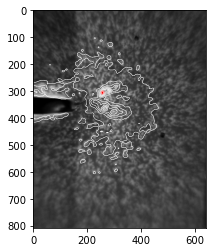

In [233]:
plt.imshow(src1,cmap = 'gray')
plt.scatter(np.where(dst==np.max(dst))[1][0], np.where(dst==np.max(dst))[0][0], c='red', s=10 )
gas = cv2.GaussianBlur(dst,(0,0), 5)
plt.contour(gas, [k for k in range(1,int(np.max(gas)),5)],colors='white',  linewidths = 0.5)
plt.savefig('./2.png',dpi=300)